In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 10
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 10
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 16
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

warnings.filterwarnings('ignore')

In [2]:
def numeric_categorical_columns(dataset):
    """
    Определяет числовые и категориальные признаки в датасете.

    Параметры:
    - dataset: DataFrame, исходный датасет.

    Возвращает:
    - numeric_columns: list, список числовых признаков.
    - categorical_columns: list, список категориальных признаков.
    """
    numeric_columns = dataset.select_dtypes(exclude=[np.object_]).columns.tolist()
    categorical_columns = dataset.select_dtypes(include=[np.object_]).columns.tolist()
    return numeric_columns, categorical_columns

In [3]:
### Что нужно предсказывать 

train = pd.read_csv('../data/train_cut.csv', index_col=0)
print(f'DataFrame shape is {train.shape}')
train.head()

DataFrame shape is (6274852, 5)


,date,store_nbr,item_nbr,unit_sales,onpromotion
id,,,,,
79,2013-01-01,25,257847,90.000,NaN
480,2013-01-01,25,953609,1.000,NaN
313,2013-01-01,25,671706,2.548,NaN
497,2013-01-01,25,999545,1.000,NaN
440,2013-01-01,25,890372,1.000,NaN


In [4]:
### Описание магазинов 

stores = pd.read_csv("../data/stores.csv")
print(f'DataFrame shape is {stores.shape}')
stores.head()

DataFrame shape is (54, 5)


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [5]:
### Описание продуктов

items = pd.read_csv("../data/items.csv")
print(f'DataFrame shape is {items.shape}')
items.head()

DataFrame shape is (4100, 4)


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [6]:
### Котировки нефти 

oil = pd.read_csv("../data/oil.csv")
print(f'DataFrame shape is {oil.shape}')
oil.head()

DataFrame shape is (1218, 2)


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [7]:
### Праздничные дни

holidays_events = pd.read_csv("../data/holidays_events.csv")
print(f'DataFrame shape is {holidays_events.shape}')
holidays_events.head()

DataFrame shape is (350, 6)


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## EDA

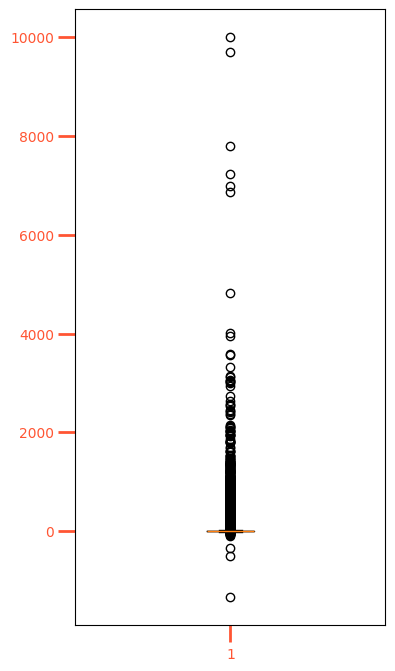

In [8]:
fig = plt.figure()
fig.set_size_inches(4, 8)
plt.boxplot(train['unit_sales'].values)
plt.show()

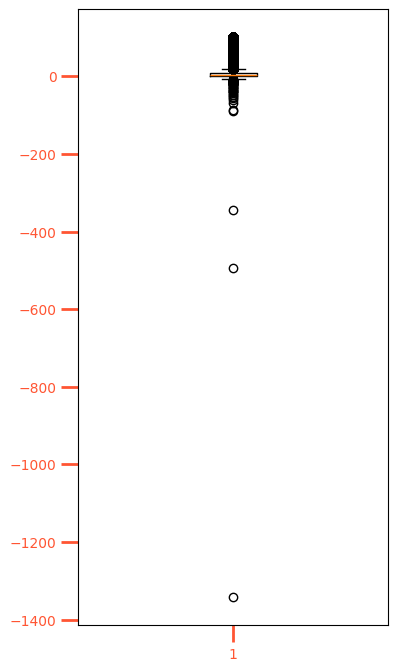

In [9]:
fig = plt.figure()
fig.set_size_inches(4, 8)
plt.boxplot(train[train['unit_sales'] <= 100]['unit_sales'].values)
plt.show()

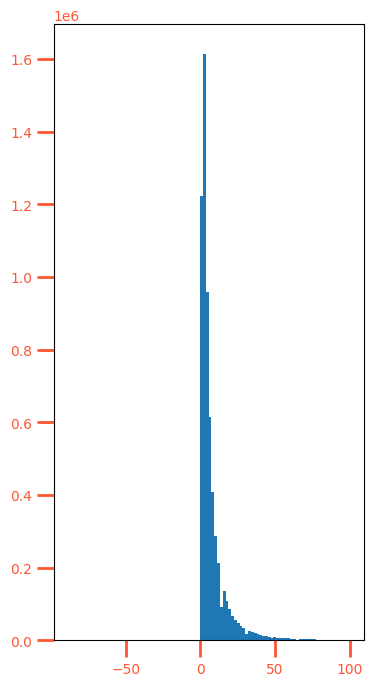

In [10]:
### Видно, что нормальное кол-во итемов, которое продается за день не превышает ~50

fig = plt.figure()
fig.set_size_inches(4, 8)
plt.hist(train[abs(train['unit_sales']) <= 100]['unit_sales'].values, bins=100)
plt.show()

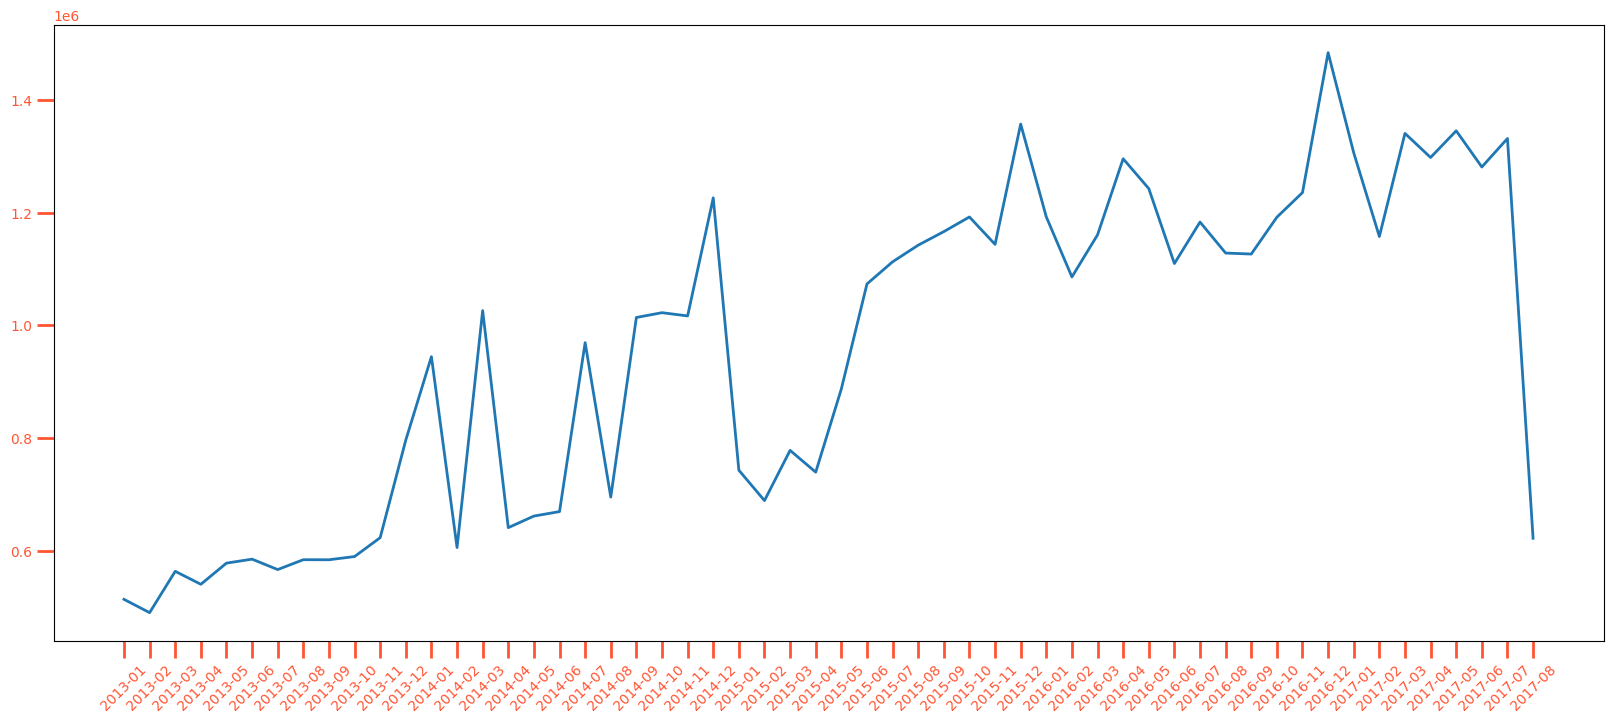

In [11]:
### Кол-во наблюдений по датам 

fig = plt.figure()
fig.set_size_inches(20, 8)

train['month'] = train.date.apply(lambda x: str(x)[:7])

plt.plot(train.groupby('month')['unit_sales'].sum())

plt.xticks(rotation=45, size=10)
plt.show()

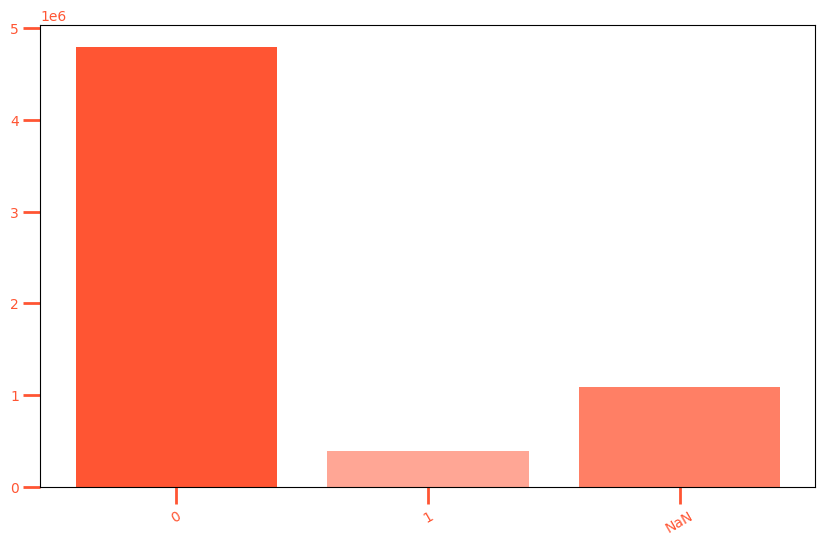

In [12]:
### Распределение onpromotion фичи

def replace_onpromotion(x):
    if x ==False:
        return 0
    elif x == True:
        return 1
    else:
        return x
    
train['onpromotion'] = train['onpromotion'].fillna("NaN")
train['onpromotion'] = train['onpromotion'].apply(replace_onpromotion).apply(str)

fig = plt.figure()
fig.set_size_inches(10, 6)


for_hist = train.groupby('onpromotion').size()
plt.bar(for_hist.index, for_hist.values, color=['#FF5533', '#FFA695', '#FF7F65'])

plt.xticks(rotation=30, size=10)

plt.show()

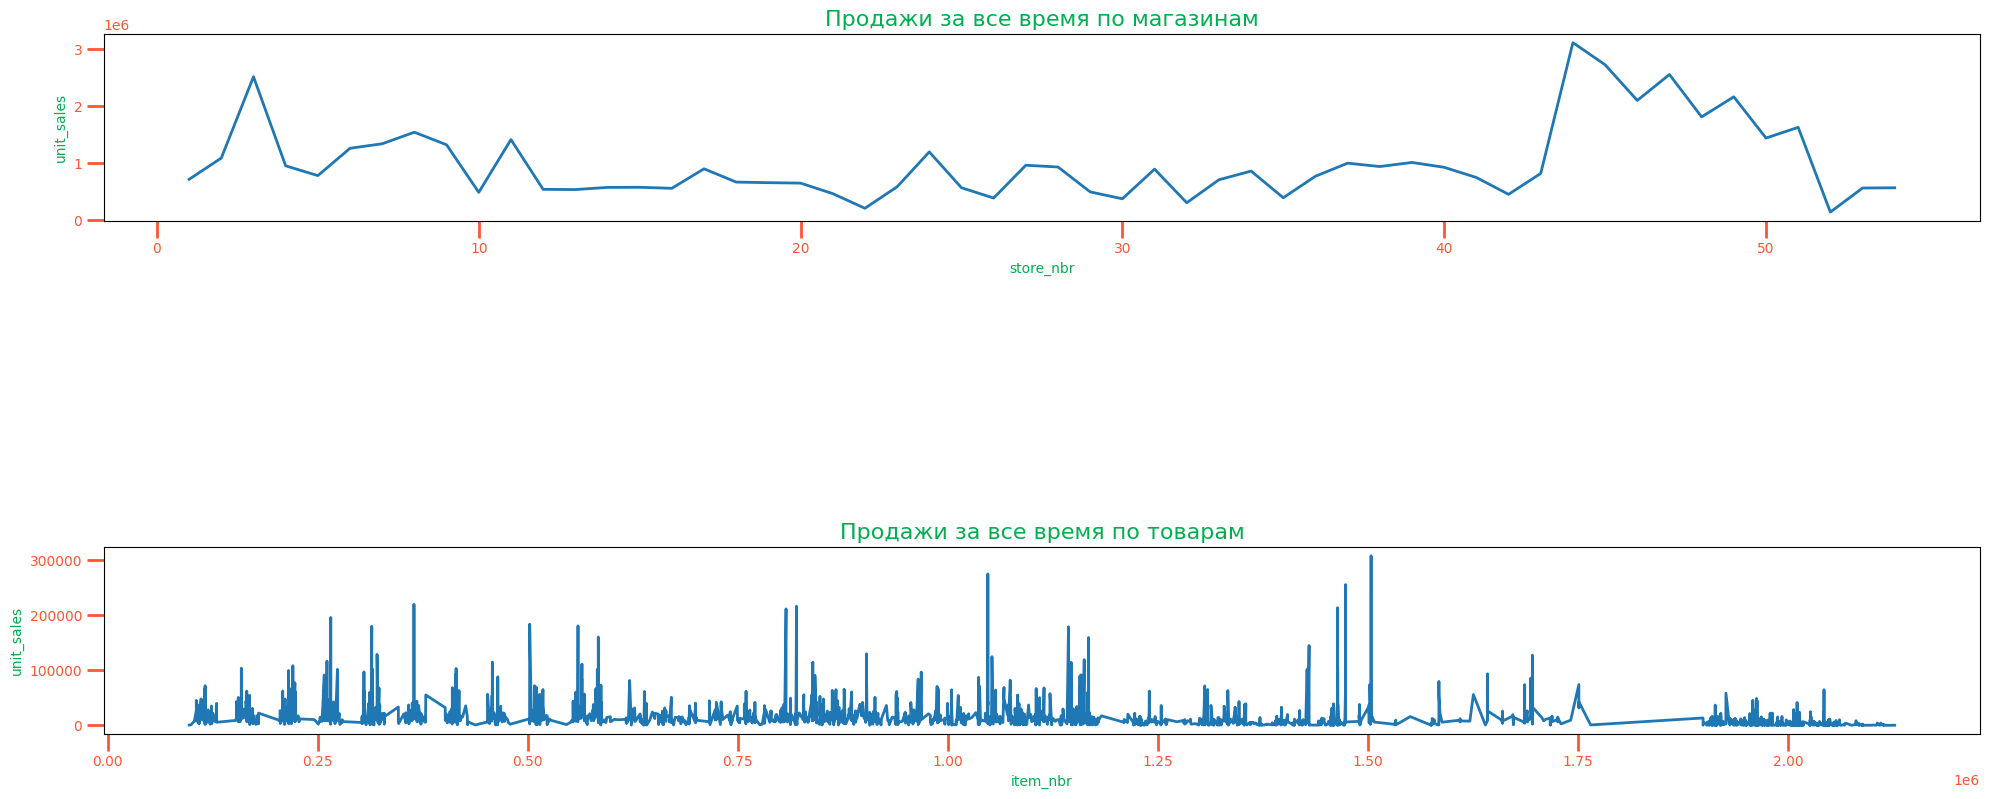

In [13]:
### Распределение магазинов и товаров 

fig = plt.figure()
fig.set_size_inches(20, 8)

ax_1 = fig.add_subplot(3, 1, 1)
sns.lineplot(
    data=train.groupby(by='store_nbr', as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
    x='store_nbr',
    y='unit_sales'
)


ax_2 = fig.add_subplot(3, 1, 3)
sns.lineplot(
    data=train.groupby(by='item_nbr', as_index=False)['unit_sales'].sum().sort_values(by='unit_sales'),
    x='item_nbr',
    y='unit_sales'
)


fig.tight_layout()

ax_1.set(title = 'Продажи за все время по магазинам')
ax_2.set(title = 'Продажи за все время по товарам')

plt.show()

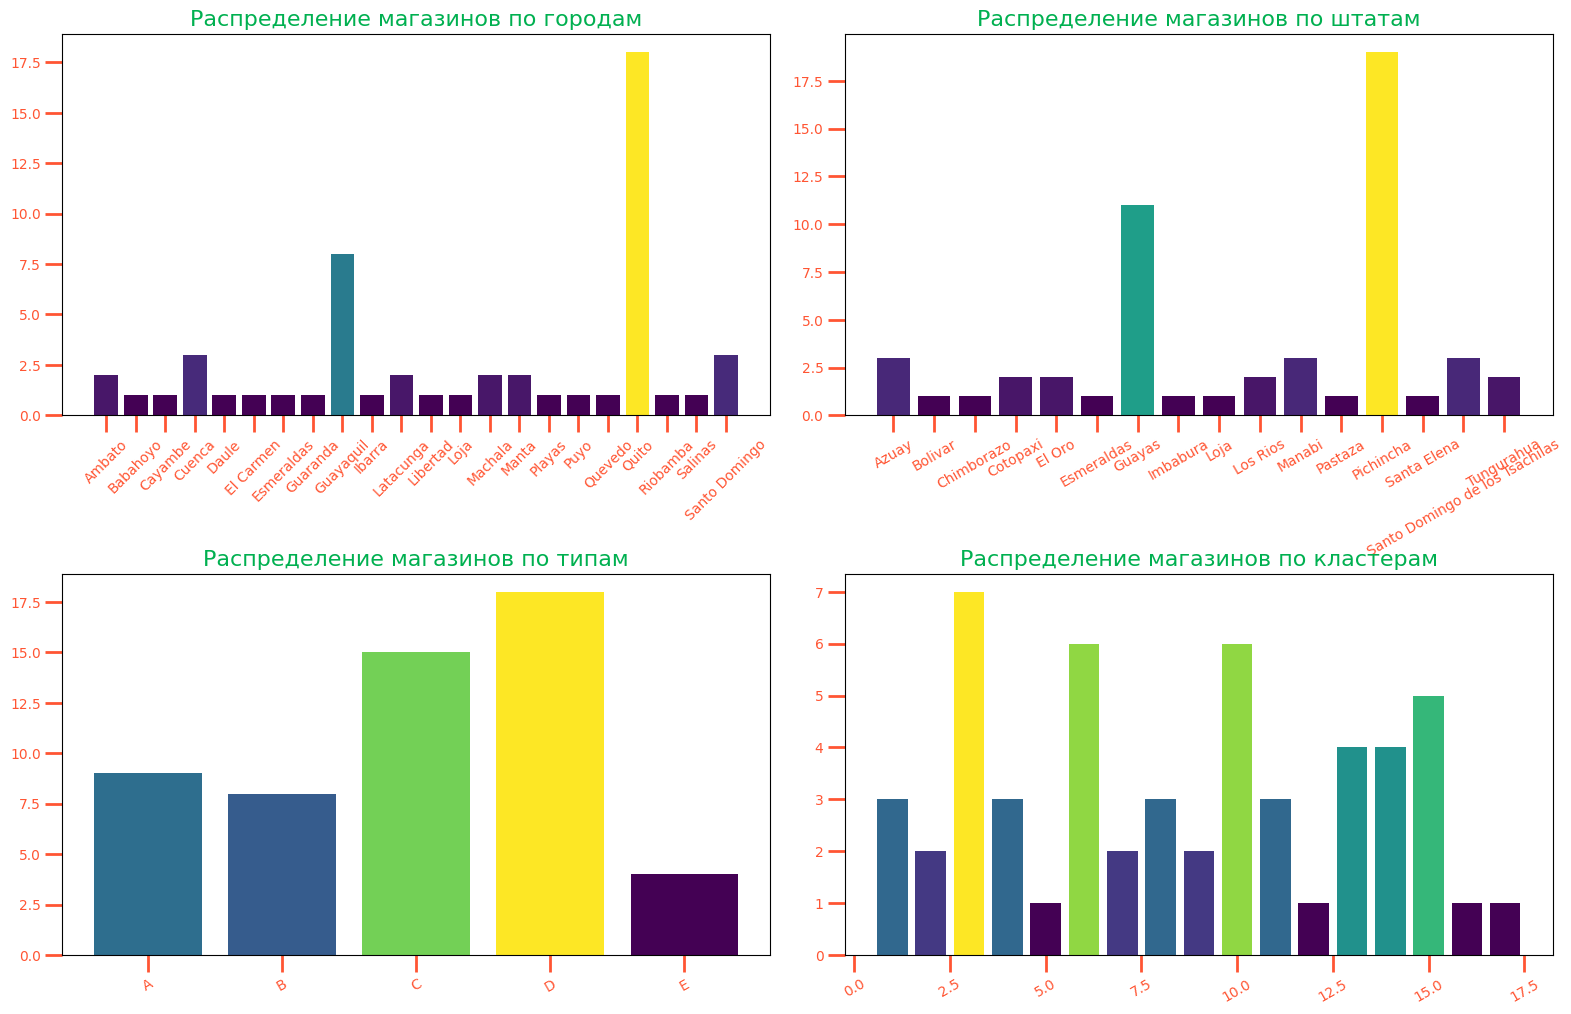

In [14]:
### Распределение магазинов по городам/штатам/типам/кластерам

fig = plt.figure()
fig.set_size_inches(16, 10)

# По городам 

ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap('viridis')
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = stores.groupby('city').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=45, size=10)

### по штатам
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = stores.groupby('state').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по типу
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = stores.groupby('type').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по кластеру
ax_4 = fig.add_subplot(2, 2, 4)

for_hist = stores.groupby('cluster').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

fig.tight_layout()

ax_1.set(title = 'Распределение магазинов по городам')
ax_2.set(title = 'Распределение магазинов по штатам')
ax_3.set(title = 'Распределение магазинов по типам')
ax_4.set(title = 'Распределение магазинов по кластерам')

plt.show()

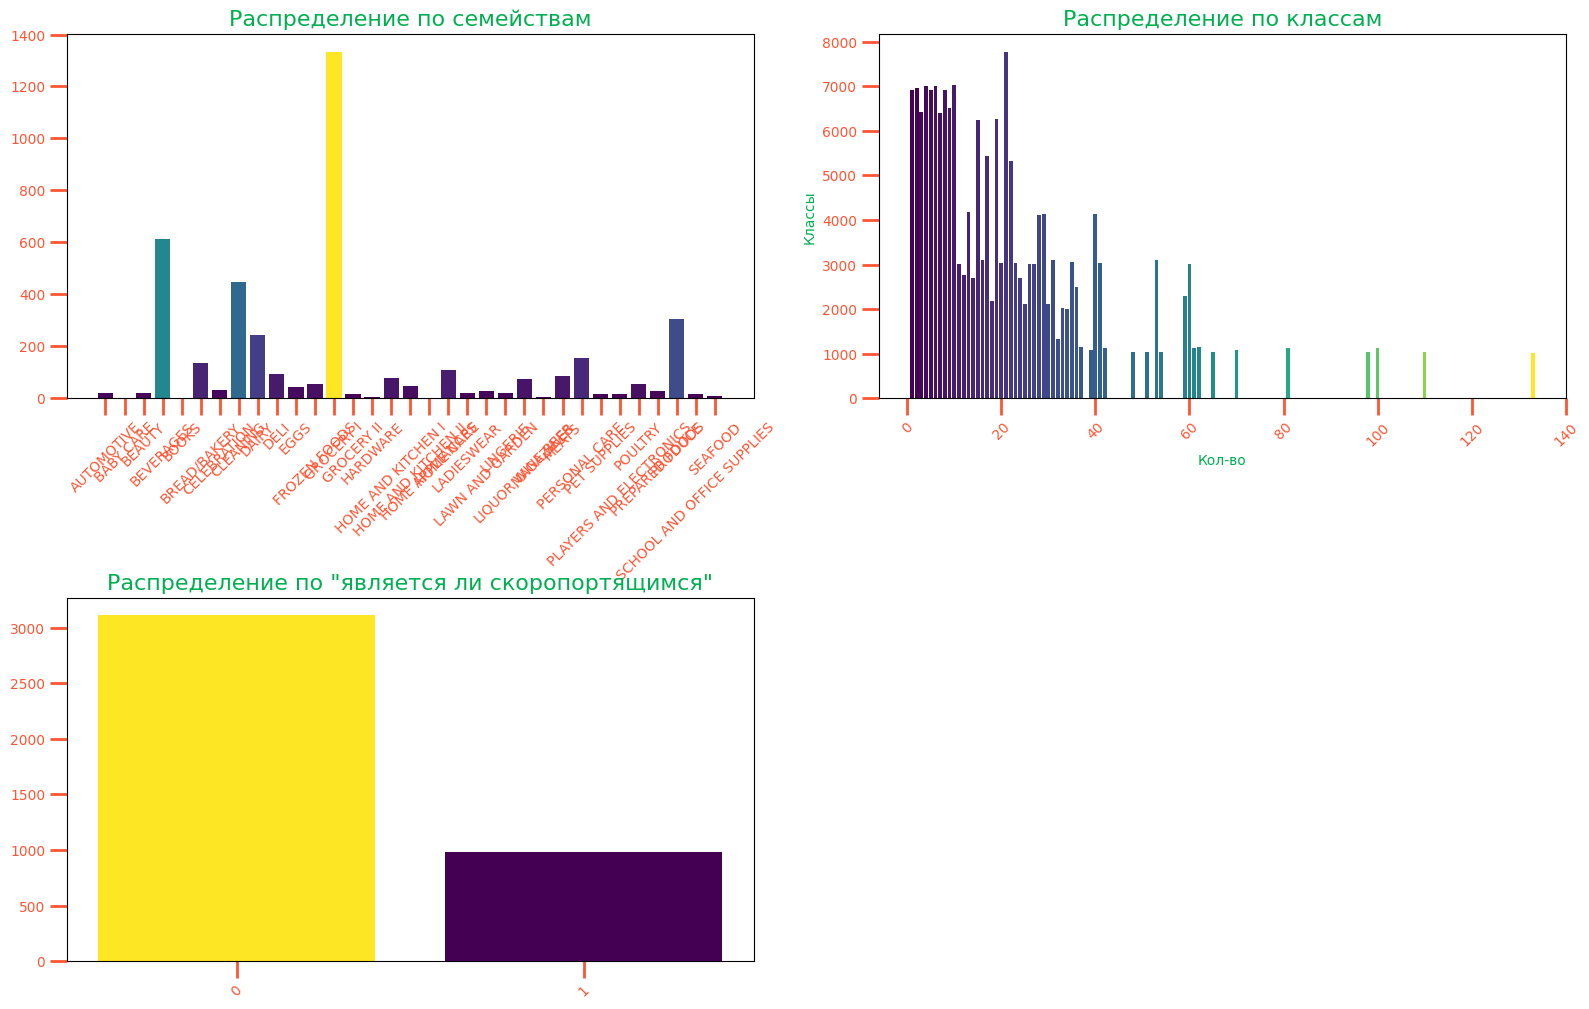

In [15]:
### Распределения продуктов

fig = plt.figure()
fig.set_size_inches(16, 10)


### по семействам
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = items.groupby('family').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=45, size=10)

### по классам
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = items.groupby('class').size().sort_values()
plt.bar(for_hist.values, for_hist.index, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=45, size=10)
plt.xlabel("Кол-во")
plt.ylabel("Классы")

### по "является ли скоропортящимся"
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = items.groupby('perishable').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=45, size=10, ticks=[0, 1])


fig.tight_layout()

ax_1.set(title = 'Распределение по семействам')
ax_2.set(title = 'Распределение по классам')
ax_3.set(title = 'Распределение по "является ли скоропортящимся"')

plt.show()

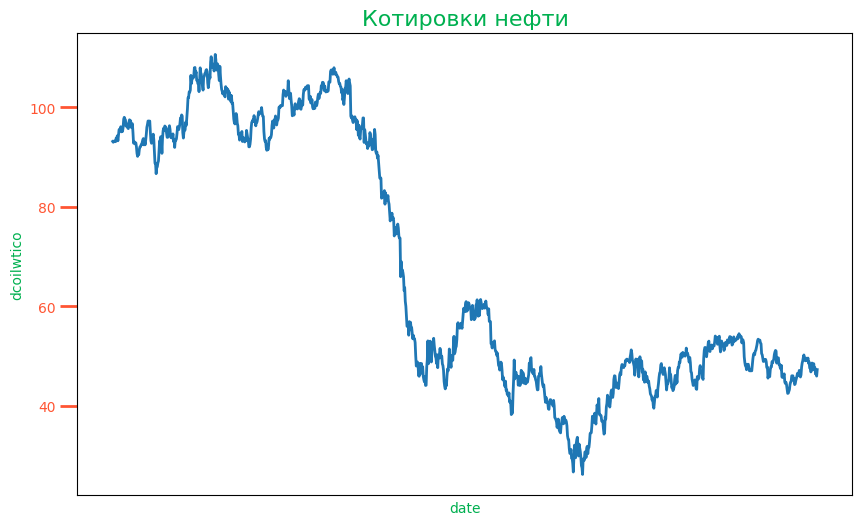

In [16]:
### Котировки нефти

fig = plt.figure()
fig.set_size_inches(10, 6)

oil = oil.fillna(method='ffill')

sns.lineplot(data=oil,
             x='date',
             y='dcoilwtico')

plt.title("Котировки нефти")
plt.xticks([])

plt.show()

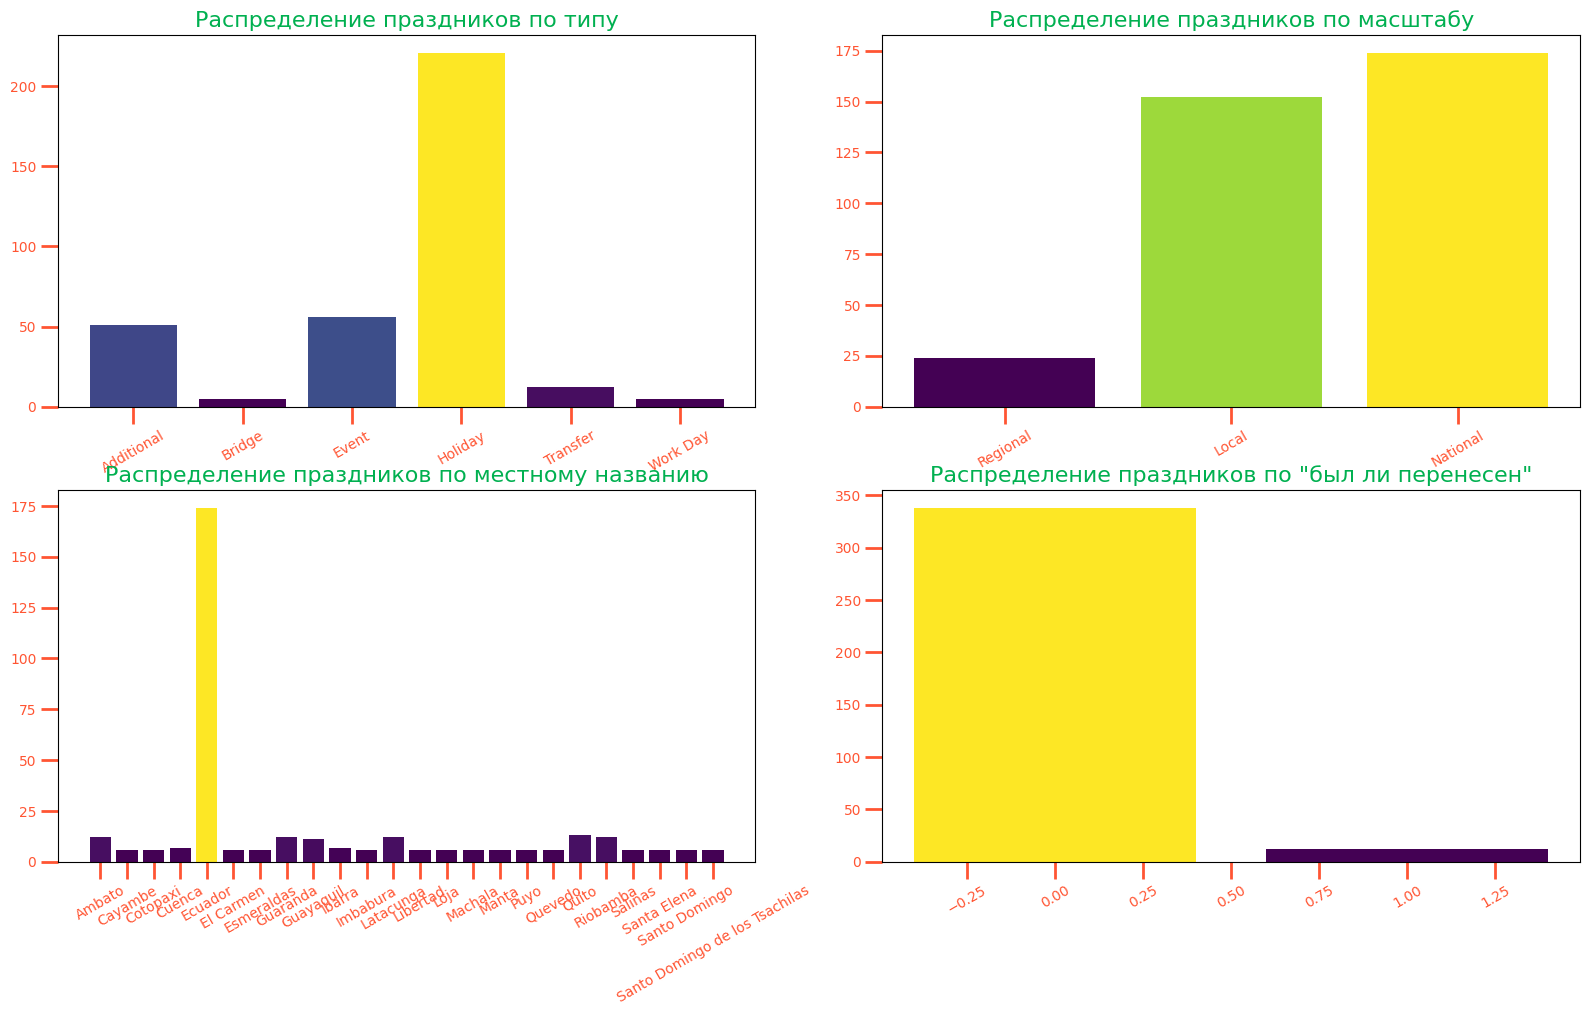

In [17]:
### Распределения выходных и праздников

fig = plt.figure()
fig.set_size_inches(16, 10)


### по типу
ax_1 = fig.add_subplot(2, 2, 1)

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = holidays_events.groupby('type').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по масштабу
ax_2 = fig.add_subplot(2, 2, 2)

for_hist = holidays_events.groupby('locale').size().sort_values()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по местному названию
ax_3 = fig.add_subplot(2, 2, 3)

for_hist = holidays_events.groupby('locale_name').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

### по "был ли перенесен"
ax_4 = fig.add_subplot(2, 2, 4)

for_hist = holidays_events.groupby('transferred').size()
plt.bar(for_hist.index, for_hist.values, color=my_cmap(rescale(for_hist.values)))
plt.xticks(rotation=30, size=10)

fig.tight_layout()

ax_1.set(title = 'Распределение праздников по типу')
ax_2.set(title = 'Распределение праздников по масштабу')
ax_3.set(title = 'Распределение праздников по местному названию')
ax_4.set(title = 'Распределение праздников по "был ли перенесен"')

plt.show()

### Соединим всю информацию в один датасет 

In [18]:
train.shape

(6274852, 6)

In [19]:
### Присоединим котировки нефти по дате

df = pd.merge(
    train, 
    oil,
    on='date',
    how='left'
)

# Заполним пропуски 

min_date_price = df[~df['dcoilwtico'].isna()].iloc[0][-1]

df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill')
df['dcoilwtico'] = df['dcoilwtico'].fillna(min_date_price)

df.shape

(6274852, 7)

In [20]:
### Присоединим информацию по магазинам 

df_2 = pd.merge(
    df, 
    stores, 
    on='store_nbr',
    how='left'
)

print(f"Размер датасета: {df_2.shape}")

df_2.isna().sum()

Размер датасета: (6274852, 11)


date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
dtype: int64

In [21]:
### Присоединим информацию по товарам 

df_3 = pd.merge(
    df_2, 
    items, 
    on="item_nbr",
    how='left'
)

print(f"Размер датасета: {df_3.shape}")

df_3.isna().sum()

Размер датасета: (6274852, 14)


date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
month          0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
family         0
class          0
perishable     0
dtype: int64

In [22]:
### Присоединим информацию по праздничным дням 

df_4 = pd.merge(
    df_3,
    holidays_events.rename({"type": "holiday_type"}, axis=1),
    on="date",
    how="left"
)

print(f"Размер датасета: {df_4.shape}")

df_4.isna().sum()

Размер датасета: (6397785, 19)


date                  0
store_nbr             0
item_nbr              0
unit_sales            0
onpromotion           0
month                 0
dcoilwtico            0
city                  0
state                 0
type                  0
cluster               0
family                0
class                 0
perishable            0
holiday_type    5306754
locale          5306754
locale_name     5306754
description     5306754
transferred     5306754
dtype: int64

In [23]:
### Так как пропусков в датафрейме с праздниками достаточно много, потому что не все дни являются праздниками - отметим отсутствующие как рабочие 

df_4["holiday_type"] = df_4["holiday_type"].fillna("WorkingDay")
df_4["locale"] = df_4["locale"].fillna("WorkingDay")
df_4["locale_name"] = df_4["locale_name"].fillna("WorkingDay")
df_4["description"] = df_4["description"].fillna("WorkingDay")
df_4["transferred"] = df_4["holiday_type"].fillna(False)

df_4.isna().sum()

date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
month           0
dcoilwtico      0
city            0
state           0
type            0
cluster         0
family          0
class           0
perishable      0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dtype: int64

### Сгенерим трансформер для обработки признаков

In [24]:
### Возвраты товаров - это скорее выбросы 

df_4 = df_4[df_4['unit_sales'] > 0]

In [25]:
X = df_4.drop('unit_sales', axis=1)
y = df_4['unit_sales']

In [26]:
##### Будем считать MSLE
y = y.apply(np.log1p)

In [27]:
### Отделим валидацию от теста по времени

X_test, X_train = X[X.date >= '2017-06-01'], X[X.date < '2017-06-01']
y_test, y_train = y[y.index.isin(X_test.index)], y[y.index.isin(X_train.index)]

In [28]:
### Уберем колонку с датой 

X_test = X_test.drop('date', axis=1)
X_train = X_train.drop('date', axis=1)
X = X.drop('date', axis=1)

In [30]:
object_cols = [
    'store_nbr', 'item_nbr', 'onpromotion', 'month',
    'city', 'state', 'type', 'cluster', 'family',
    'class', 'perishable', 'holiday_type', 'locale',
    'locale_name', 'description', 'transferred'
]

X[object_cols].head()

,store_nbr,item_nbr,onpromotion,month,city,state,type,cluster,family,class,perishable,holiday_type,locale,locale_name,description,transferred
0,25,257847,NaN,2013-01,Salinas,Santa Elena,D,1,BEVERAGES,1120,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
1,25,953609,NaN,2013-01,Salinas,Santa Elena,D,1,CLEANING,3046,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
2,25,671706,NaN,2013-01,Salinas,Santa Elena,D,1,DELI,2664,1,Holiday,National,Ecuador,Primer dia del ano,Holiday
3,25,999545,NaN,2013-01,Salinas,Santa Elena,D,1,CLEANING,3026,0,Holiday,National,Ecuador,Primer dia del ano,Holiday
4,25,890372,NaN,2013-01,Salinas,Santa Elena,D,1,GROCERY I,1002,0,Holiday,National,Ecuador,Primer dia del ano,Holiday


In [31]:
X[object_cols] = X[object_cols].astype(object)
X_test[object_cols] = X_test[object_cols].astype(object)
X_train[object_cols] = X_train[object_cols].astype(object)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
import itertools

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self,
                 object_columns=[],
                 target_name='unit_sales'):
        
        self.object_columns = object_columns
        self.target_name = target_name
        
                
    def fit(self,
            X,
            y):
        
        X_fit = X.copy()
        y_fit = y.copy()
        
        self.numeric_columns = [x for x in X_fit.columns if x not in self.object_columns]
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1)
        
        ### Сгенерим колонки к которым применим One-Hot-Encoding
        self.cols_for_ohe = [col for col in self.object_columns
                             if 
                             X_with_target[col].nunique() <= 10]
        
        ### Запомним все ohe колонки и их названия!
        self.ohe_names = {col : sorted([f"{col}_{value}" for value in X_with_target[col].unique()]) for col in self.cols_for_ohe}
        
        
        ### Сгенерим колонки к которым применим Mean-Target-Encoding
        self.cols_for_mte = [col for col in self.object_columns
                             if X_with_target[col].nunique() > 10]
        
        ### Посчитаем на валидации средние значения таргета
        self.dict_of_means = {col : X_with_target.groupby(col)[self.target_name].mean()
                              for col in self.cols_for_mte}
        
        
        return self
    
    def transform(self,
                  X,
                  y=None):
        
        X_ = X.copy()
        
        
        data_part = pd.get_dummies(X_[self.cols_for_ohe],
                                   prefix=self.cols_for_ohe)
        
        data_part_cols = data_part.columns
        
        X_ = X_.drop(self.cols_for_ohe, axis=1)
        X_ = pd.concat((X_, data_part), axis=1)
        
    
        for col in self.cols_for_mte:
                X_[col] = X_[col].map(self.dict_of_means[col])
                
                mean_value = self.dict_of_means[col].values.mean()
                
                X_[col] = X_[col].fillna(mean_value)
                
            
            
        all_ohe = list(itertools.chain(*list(self.ohe_names.values())))
        
        missing_columns = [x 
                           for x in all_ohe
                           if x not in X_.columns
                           and
                           x not in self.numeric_columns]

        extra_columns = [x
                         for x in data_part_cols
                         if x not in all_ohe]
        
        ### Новые категории необходимо убрать
        X_ = X_.drop(extra_columns, axis=1)
    
        ### Отсутствующие категории (бинарные колонки)
        ### необходимо добавить: заполним их просто нулями
        
        if len(missing_columns) != 0:

            zeros = np.zeros((X_.shape[0], len(missing_columns)))
            zeros = pd.DataFrame(zeros,
                                 columns=missing_columns,
                                 index=X_.index)

            X_ = pd.concat((X_, zeros), axis=1)
            
        return X_[sorted(X_.columns)]

In [33]:
### Проверка 

transformer = CustomFunctionTransformer(object_columns=object_cols)

transformer.fit(X_train, y_train)

CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                          'onpromotion', 'month', 'city',
                                          'state', 'type', 'cluster', 'family',
                                          'class', 'perishable', 'holiday_type',
                                          'locale', 'locale_name',
                                          'description', 'transferred'])

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
import itertools

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self,
                 object_columns=[],
                 target_name='y',
                 encoding_threshold=10,
                 fillna_strategy='mean',
                 encoding_method='one_hot'):
        
        self.object_columns = object_columns
        self.target_name = target_name
        self.encoding_threshold = encoding_threshold
        self.fillna_strategy = fillna_strategy
        self.encoding_method = encoding_method
        
                
    def fit(self,
            X,
            y):
        
        X_fit = X.copy()
        y_fit = y.copy()
        
        self.numeric_columns = [x for x in X_fit.columns if x not in self.object_columns]
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1)
        
        ### Сгенерим колонки к которым применим One-Hot-Encoding
        self.cols_for_ohe = [col for col in self.object_columns
                             if 
                             X_with_target[col].nunique() <= self.encoding_threshold]
        
        ### Запомним все ohe колонки и их названия!
        self.ohe_names = {col : sorted([f"{col}_{value}" for value in X_with_target[col].unique()]) for col in self.cols_for_ohe}
        
        
        ### Сгенерим колонки к которым применим Mean-Target-Encoding
        self.cols_for_mte = [col for col in self.object_columns
                             if X_with_target[col].nunique() > self.encoding_threshold]
        
        ### Посчитаем на валидации средние значения таргета
        self.dict_of_means = {col : X_with_target.groupby(col)[self.target_name].mean()
                        for col in self.cols_for_mte}
        
        return self
    
    
    def transform(self,
                  X,
                  y=None):
        
        X_ = X.copy()
        
        
        if self.encoding_method == 'one_hot':
            data_part = pd.get_dummies(X_[self.cols_for_ohe],
                                       prefix=self.cols_for_ohe)
            data_part.replace({False: 0, True: 1}, inplace=True)
        elif self.encoding_method == 'label':
            data_part = self._label_encoding(X_)
        else:
            raise ValueError("Unsupported encoding method. Please choose either 'one_hot' or 'label'.")

        data_part_cols = data_part.columns
        
        X_ = X_.drop(self.cols_for_ohe, axis=1)
        X_ = pd.concat((X_, data_part), axis=1)
        
    
        for col in self.cols_for_mte:
            X_[col] = X_[col].map(self.dict_of_means[col])
                
            if self.fillna_strategy == 'mean':
                mean_value = self.dict_of_means[col].values.mean()
                X_[col] = X_[col].fillna(mean_value)
            elif self.fillna_strategy == 'mode':
                mode_value = X_[col].mode()[0]
                X_[col] = X_[col].fillna(mode_value)
            else:
                raise ValueError("Unsupported fillna strategy. Please choose either 'mean' or 'mode'.")
                
            
            
        all_ohe = list(itertools.chain(*list(self.ohe_names.values())))
        
        missing_columns = [x 
                           for x in all_ohe
                           if x not in X_.columns
                           and
                           x not in self.numeric_columns]

        extra_columns = [x
                         for x in data_part_cols
                         if x not in all_ohe]
        
        ### Новые категории необходимо убрать
        X_ = X_.drop(extra_columns, axis=1)
    
        ### Отсутствующие категории (бинарные колонки)
        ### необходимо добавить: заполним их просто нулями
        
        if len(missing_columns) != 0:

            zeros = np.zeros((X_.shape[0], len(missing_columns)))
            zeros = pd.DataFrame(zeros,
                                 columns=missing_columns,
                                 index=X_.index)

            X_ = pd.concat((X_, zeros), axis=1)
            
        return X_[sorted(X_.columns)]
    
    def _label_encoding(self, X):
        label_encoders = {}
        for col in self.cols_for_ohe:
            le = LabelEncoder()
            X[col] = le.fit_transform(X[col])
            label_encoders[col] = le
        return X

In [37]:
transformer = CustomFunctionTransformer(object_columns=object_cols, target_name="unit_sales")

transformer.fit(X_train, y_train)

CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                          'onpromotion', 'month', 'city',
                                          'state', 'type', 'cluster', 'family',
                                          'class', 'perishable', 'holiday_type',
                                          'locale', 'locale_name',
                                          'description', 'transferred'],
                          target_name='unit_sales')

In [38]:
check_train = transformer.transform(X_train)
check_test = transformer.transform(X_test)

In [39]:
check_train

,city,class,cluster,dcoilwtico,description,family,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,...,transferred_Event,transferred_Holiday,transferred_Transfer,transferred_Work Day,transferred_WorkingDay,type_A,type_B,type_C,type_D,type_E
0,1.470042,2.213575,1.670262,93.14,1.602792,1.950299,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,1.470042,1.549459,1.670262,93.14,1.602792,1.575496,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,1.470042,1.162491,1.670262,93.14,1.602792,1.585522,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,1.470042,1.807048,1.670262,93.14,1.602792,1.575496,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4,1.470042,1.338276,1.670262,93.14,1.602792,1.710138,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5980888,1.929557,2.051363,1.799537,48.29,1.750490,1.950299,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5980889,1.671871,1.873412,1.604993,48.29,1.750490,1.710138,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5980890,1.661150,1.972361,1.643954,48.29,1.750490,1.710138,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5980891,1.929557,1.606088,2.044380,48.29,1.750490,1.950299,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("custom_transformer",
    CustomFunctionTransformer(object_columns=object_cols,
                              target_name="unit_sales")),
    ("decision_tree",
     DecisionTreeRegressor())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(object_columns=['store_nbr',
                                                           'item_nbr',
                                                           'onpromotion',
                                                           'month', 'city',
                                                           'state', 'type',
                                                           'cluster', 'family',
                                                           'class',
                                                           'perishable',
                                                           'holiday_type',
                                                           'locale',
                                                           'locale_name',
                                                           'description',
                                                           'transferred'],
                                           target_name='unit_sales')),
                ('decision_tree', DecisionTreeRegressor())])

In [41]:
### Замерим качество работы модели

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

train_error = np.mean((train_preds - y_train)**2)
test_error = np.mean((test_preds - y_test)**2)

print(f"Качество на трейне {train_error.round(3)}")
print(f"Качество на тесте {test_error.round(3)}")

Качество на трейне 0.004
Качество на тесте 0.687


In [42]:
pipe.get_params()

{'memory': None,
 'steps': [('custom_transformer',
   CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                             'onpromotion', 'month', 'city',
                                             'state', 'type', 'cluster', 'family',
                                             'class', 'perishable', 'holiday_type',
                                             'locale', 'locale_name',
                                             'description', 'transferred'],
                             target_name='unit_sales')),
  ('decision_tree', DecisionTreeRegressor())],
 'verbose': False,
 'custom_transformer': CustomFunctionTransformer(object_columns=['store_nbr', 'item_nbr',
                                           'onpromotion', 'month', 'city',
                                           'state', 'type', 'cluster', 'family',
                                           'class', 'perishable', 'holiday_type',
                                      

In [48]:
### Попробуем контроллировать обобщающую способность такой модели 

from sklearn.model_selection import TimeSeriesSplit

splitter = TimeSeriesSplit(n_splits=3)

from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [10],
    "decision_tree__min_samples_split": [10],
    "decision_tree__min_impurity_decrease": [0.2],
    "decision_tree__max_leaf_nodes": [1000]
}

### Передадим в GridSearchCV

search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=splitter, 
    scoring="neg_mean_squared_error",
    verbose=10
)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

print(f"Качество лучше модели на финальном тесте: {search.score(X_test, y_test)}]")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3; 1/1] START decision_tree__max_depth=10, decision_tree__max_leaf_nodes=1000, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10
[CV 1/3; 1/1] END decision_tree__max_depth=10, decision_tree__max_leaf_nodes=1000, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.798 total time=  34.7s
[CV 2/3; 1/1] START decision_tree__max_depth=10, decision_tree__max_leaf_nodes=1000, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10
[CV 2/3; 1/1] END decision_tree__max_depth=10, decision_tree__max_leaf_nodes=1000, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10;, score=-0.771 total time=  53.7s
[CV 3/3; 1/1] START decision_tree__max_depth=10, decision_tree__max_leaf_nodes=1000, decision_tree__min_impurity_decrease=0.2, decision_tree__min_samples_split=10
[CV 3/3; 1/1] END decision_tree__max_depth=10, decision_tree__

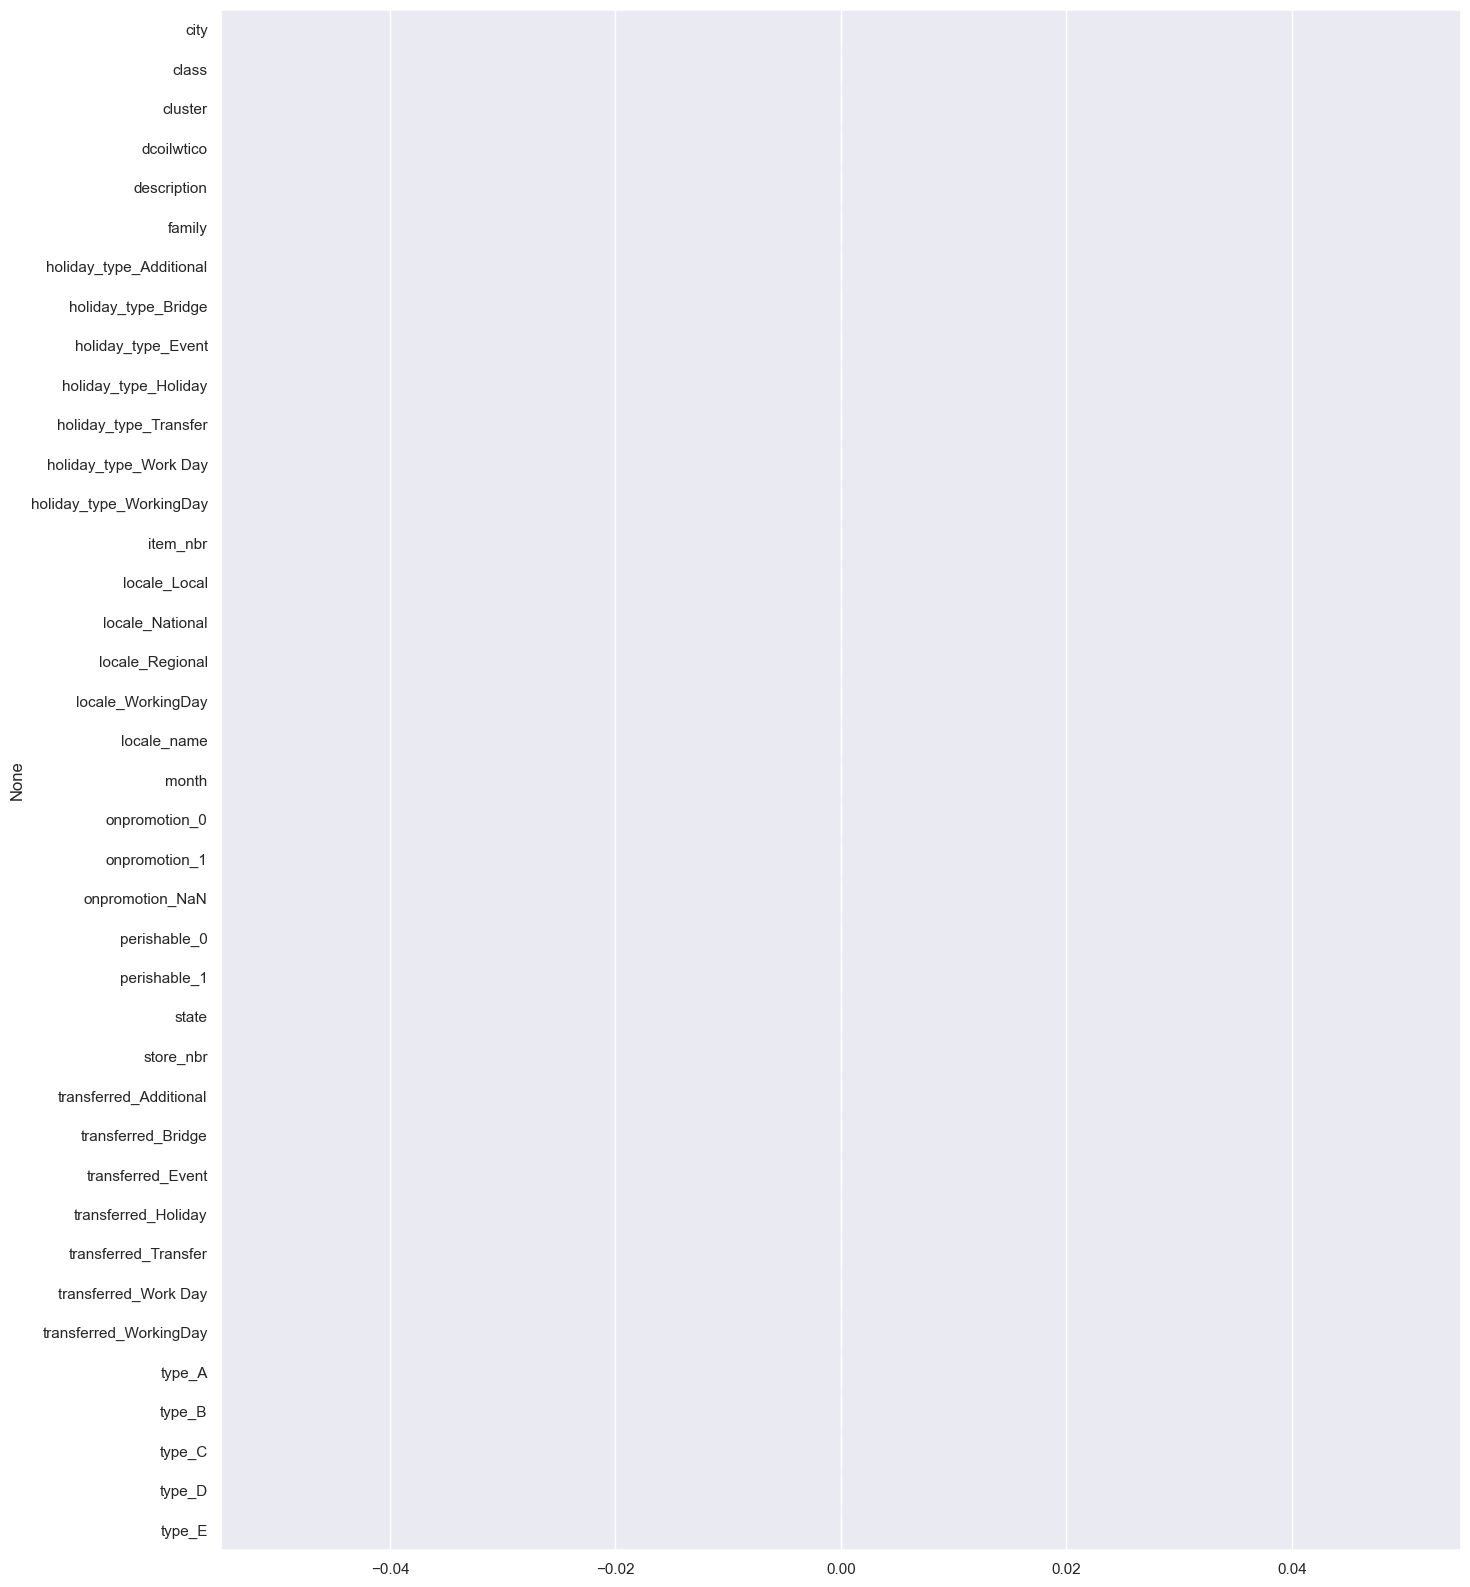

In [49]:
fig = plt.figure()
fig.set_size_inches(16, 20)

sns.barplot(x=search.best_estimator_['decision_tree'].feature_importances_,
            y=check_test.columns)

plt.show()